In [84]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

In [85]:
#Read EstSoil-EH

estsoil_12c = "Data\\updated_sample_source_data\\updated_soc_source\\sql_transfer_estsoil_eh_12c_ndvi_geol.fgb"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soiltype,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,soc1,bd1,k1,awc1,z2,est_txt2,lxtype2,est_crs2,sand2,silt2,clay2,rock2,soc2,bd2,k2,awc2,z3,est_txt3,lxtype3,est_crs3,sand3,silt3,clay3,rock3,soc3,bd3,k3,awc3,z4,est_txt4,lxtype4,est_crs4,sand4,silt4,clay4,rock4,soc4,bd4,k4,awc4,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,varv,kkt,ndvi_mean,ndvi_median,ndvi_stdev,geol_kivim,geometry
0,415405,LG,PZ-cb.ab.gl,PZ,l100,1.0,1000.0,1000.0,l,S,,90,5,5,0,1.346681,1.448223,133.21,0.192917,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15292.95385,0.158335,0.109296,0.150707,8.596172,8.707156,1.163940,2.089215,1.457337,1.989658,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,13243.957186,86.601695,0.000000,0.00000,2048.996664,13.398305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,KR,0.899488,0.908776,0.033655,None,"MULTIPOLYGON (((700666.080 6380328.780, 700678..."
1,488739,LkI,RT-ab.dy,RT,l200,1.0,2000.0,2000.0,l,S,,90,5,5,0,1.467205,1.433231,133.21,0.192619,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71719.33280,0.099199,0.087435,0.060710,9.202870,9.193724,0.819461,1.385673,1.207214,0.928681,0.127143,0.097556,0.159294,NaN,NaN,0.0,0.0,29650.837717,41.342880,42068.495083,58.65712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.799791,0.857820,0.179295,mergel,"MULTIPOLYGON (((700672.470 6380343.110, 700668..."
2,126206,GI,GL-eu-lv,GL,sl50/ls₂,2.0,1000.0,500.0,sl,LS,,82,9,9,0,9.388041,0.852959,37.54,0.196500,1000.0,ls2,L,,55.0,30.0,15.0,0.0,10.086015,0.823576,9.04,0.1875,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99414.74855,0.210899,0.135479,0.195869,8.563610,8.661306,1.411040,2.559636,1.683007,2.548854,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,17437.745561,17.540401,77061.551328,77.51521,2944.879295,2.962216,880.798224,0.885983,70.274232,0.070688,1055.025875,1.061237,14,TA,0.731221,0.846522,0.214172,mergel,"MULTIPOLYGON (((700727.900 6380023.890, 700699..."
3,499116,LkI,RT-ab.dy,RT,l200,1.0,2000.0,2000.0,l,S,,90,5,5,0,3.549619,1.215783,133.21,0.194286,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14303.73930,0.068728,0.056807,0.044750,9.896625,9.914714,0.843684,0.863418,0.700996,0.683578,0.085900,0.070356,0.098342,NaN,NaN,0.0,0.0,14303.739300,100.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.883113,0.885041,0.014856,mergel,"MULTIPOLYGON (((700523.870 6380688.330, 700517..."
4,719585,M''',HS-sa,HS,t₃150,1.0,1500.0,1500.0,t3,PEAT,,15,15,70,0,29.188059,0.423921,9.20,0.195000,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14611.02725,0.069624,0.057916,0.043150,10.284142,10.325519,0.827995,0.882133,0.692515,0.676718,0.098520,0.094868,0.090404,NaN,NaN,0.0,0.0,14604.563580,99.955762,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.463670,0.044238,17,SS,0.876797,0.880973,0.021626,mergel,"MULTIPOLYGON (((700511.620 6380925.410, 700516..."


In [86]:
#Drop soc1 soc2 soc3 soc4 values
no_soc_data = data.drop(["soc1","soc2","soc3","soc4"],axis=1)
no_soc_data.columns

Index(['orig_fid', 'est_soiltype', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'bd1', 'k1', 'awc1', 'z2', 'est_txt2',
       'lxtype2', 'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'bd2', 'k2',
       'awc2', 'z3', 'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3',
       'clay3', 'rock3', 'bd3', 'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4',
       'est_crs4', 'sand4', 'silt4', 'clay4', 'rock4', 'bd4', 'k4', 'awc4',
       'unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean',
       'twi_stdev', 'twi_median', 'slp_mean', 'slp_stdev', 'slp_median',
       'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
       'area_arable', 'arable_pct', 'area_forest', 'forest_pct',
       'area_grassland', 'grassland_pct', 'area_wetland', 'wetland_pct',
       'area_urban', 'urban_pct', 'area_water', 'water_pct', 'area_other',
       'other_pct', 'varv', 'kkt', 'ndvi_mean', 

In [87]:
#Drop all unnecessary columns(ones which are calculated based on previous SOC data and the ones which are already exist in soc_samples data)
#before joining to soc_samples data


sorted_data = no_soc_data.drop(['wrb_code',  'est_crs1', 'bd1', 'est_txt2', 'lxtype2', 
                    'est_crs2','bd2','k2','est_txt3', 'lxtype3', 'est_crs3', 'bd3', 'k3', 'est_txt4','lxtype4','est_crs4',
                       'bd4', 'k4','unit_area',  
                            'z2', 'sand2', 'clay2',
                                'rock2', 'z3', 'sand3', 'silt3','clay3','rock3','z4','sand4','awc2', 'awc3', 'awc4',
                               'silt4','clay4','rock4','silt2'],axis=1)
                                
#editing typos in column names
sorted_data.rename(columns={'wetland_pc' : 'wetland_pct', 'area_wetla' : 'area_wetland', 'grassland_' : 'grassland_pct', 
                            'area_arabl' : 'area_arable', 'area_fores':'area_forest','area_grass': 'area_grassland' }, inplace=True)                                
                                
                        

sorted_data.head()



,orig_fid,est_soiltype,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,varv,kkt,ndvi_mean,ndvi_median,ndvi_stdev,geol_kivim,geometry
0,415405,LG,PZ,l100,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.192917,0.158335,0.109296,0.150707,8.596172,8.707156,1.163940,2.089215,1.457337,1.989658,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,13243.957186,86.601695,0.000000,0.00000,2048.996664,13.398305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,KR,0.899488,0.908776,0.033655,None,"MULTIPOLYGON (((700666.080 6380328.780, 700678..."
1,488739,LkI,RT,l200,1.0,2000.0,2000.0,l,S,90,5,5,0,133.21,0.192619,0.099199,0.087435,0.060710,9.202870,9.193724,0.819461,1.385673,1.207214,0.928681,0.127143,0.097556,0.159294,NaN,NaN,0.0,0.0,29650.837717,41.342880,42068.495083,58.65712,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.799791,0.857820,0.179295,mergel,"MULTIPOLYGON (((700672.470 6380343.110, 700668..."
2,126206,GI,GL,sl50/ls₂,2.0,1000.0,500.0,sl,LS,82,9,9,0,37.54,0.196500,0.210899,0.135479,0.195869,8.563610,8.661306,1.411040,2.559636,1.683007,2.548854,NaN,0.000000,NaN,NaN,NaN,0.0,0.0,17437.745561,17.540401,77061.551328,77.51521,2944.879295,2.962216,880.798224,0.885983,70.274232,0.070688,1055.025875,1.061237,14,TA,0.731221,0.846522,0.214172,mergel,"MULTIPOLYGON (((700727.900 6380023.890, 700699..."
3,499116,LkI,RT,l200,1.0,2000.0,2000.0,l,S,90,5,5,0,133.21,0.194286,0.068728,0.056807,0.044750,9.896625,9.914714,0.843684,0.863418,0.700996,0.683578,0.085900,0.070356,0.098342,NaN,NaN,0.0,0.0,14303.739300,100.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.883113,0.885041,0.014856,mergel,"MULTIPOLYGON (((700523.870 6380688.330, 700517..."
4,719585,M''',HS,t₃150,1.0,1500.0,1500.0,t3,PEAT,15,15,70,0,9.20,0.195000,0.069624,0.057916,0.043150,10.284142,10.325519,0.827995,0.882133,0.692515,0.676718,0.098520,0.094868,0.090404,NaN,NaN,0.0,0.0,14604.563580,99.955762,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.463670,0.044238,17,SS,0.876797,0.880973,0.021626,mergel,"MULTIPOLYGON (((700511.620 6380925.410, 700516..."


In [88]:
sorted_data.isnull().sum()

orig_fid               0
est_soiltype           0
wrb_main               0
est_txcode             0
nlayers                0
zmx                    0
z1                     0
est_txt1               0
lxtype1                0
sand1                  0
silt1                  0
clay1                  0
rock1                  0
k1                     0
awc1                 482
tri_mean              99
tri_stdev             99
tri_median            99
twi_mean              99
twi_stdev             99
twi_median            99
slp_mean              95
slp_stdev             95
slp_median            95
ls_mean             7948
ls_stdev            1210
ls_median           7948
area_drain        476573
drain_pct         476573
area_arable            0
arable_pct             0
area_forest            0
forest_pct             0
area_grassland         0
grassland_pct          0
area_wetland           0
wetland_pct            0
area_urban             0
urban_pct              0
area_water             0


In [89]:
sorted_data["area_drain"] = sorted_data["area_drain"].fillna(0)  #fill with zero

sorted_data["drain_pct"] = sorted_data["drain_pct"].fillna(0) #fill with zero

In [90]:
processed_data = sorted_data.dropna(subset=["awc1", "tri_mean", "tri_stdev","twi_mean","twi_stdev",
                                   "slp_median","ls_mean", "ls_stdev", "ls_median","tri_median","geol_kivim"])


In [91]:
processed_data.isnull().sum()


orig_fid          0
est_soiltype      0
wrb_main          0
est_txcode        0
nlayers           0
zmx               0
z1                0
est_txt1          0
lxtype1           0
sand1             0
silt1             0
clay1             0
rock1             0
k1                0
awc1              0
tri_mean          0
tri_stdev         0
tri_median        0
twi_mean          0
twi_stdev         0
twi_median        0
slp_mean          0
slp_stdev         0
slp_median        0
ls_mean           0
ls_stdev          0
ls_median         0
area_drain        0
drain_pct         0
area_arable       0
arable_pct        0
area_forest       0
forest_pct        0
area_grassland    0
grassland_pct     0
area_wetland      0
wetland_pct       0
area_urban        0
urban_pct         0
area_water        0
water_pct         0
area_other        0
other_pct         0
varv              0
kkt               0
ndvi_mean         0
ndvi_median       0
ndvi_stdev        0
geol_kivim        0
geometry          0


In [92]:
processed_data.shape

(737190, 50)

In [93]:
# read soc data
soc_samples = gpd.read_file('Data\\updated_sample_source_data\\updated_soc_samples\\soc_rf_redone_3301_plus_plus.gpkg', layer = "soc_train_samples_outrem_origfid_avg_plus")
soc_samples.head()

,SOC_mean,origin,geol_kivim,ndvi,orig_fid,est_soiltype,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,est_crs1,sand1,silt1,clay1,rock1,awc1,unit_area,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,varv,geometry
0,11.078491,estonian_alvars_soil_sample_single_dataset.shp,lubjakivi,0.833887,15159.0,ArG,FL-gl.wso,FL,k⁰₃ls₁,1.0,1000.0,1000.0,ls1,SL,k⁰,65.0,20.0,15.0,25.0,0.195208,89012.199332,0.119379,0.094597,0.090130,9.443350,9.538773,1.261606,1.658437,1.243509,1.394890,NaN,0.135415,NaN,NaN,NaN,186.081469,0.209052,26892.148947,30.211757,40509.107083,45.509613,14651.735166,16.460368,0.000000,0.000000,1061.431376,1.192456,20363.430457,22.877123,15.0,POINT (443390.670 6494246.123)
1,1.056000,envir_biosoils_survey.shp,liivakivi,0.853924,22283.0,D,UM-dl.hp,UM,l,1.0,1000.0,1000.0,l,S,,90.0,5.0,5.0,0.0,0.181111,25583.014316,0.359436,0.310175,0.183058,8.377213,8.315854,1.766274,5.510215,4.677907,2.831961,1.533490,1.099277,1.602366,NaN,NaN,11451.209081,44.760985,14131.805235,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,POINT (661204.025 6433312.518)
2,5.339205,rmk_soil_data.shp,liivakivi,0.875607,45116.0,Dg,UM-dl.gln,UM,sl,1.0,1000.0,1000.0,sl,LS,,82.0,9.0,9.0,0.0,0.191667,1948.785206,0.484878,0.413770,0.261519,5.741060,5.743954,1.319859,7.120438,6.196542,3.991416,0.619777,0.000000,1.075023,NaN,NaN,0.000000,0.000000,1948.785206,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.0,POINT (593729.152 6457480.739)
3,1.000000,envir_kese_muld_export.shp,liivakivi,0.831588,86756.0,E2o,RG-br.eu,RG,v⁰₁ls,1.0,1000.0,1000.0,ls,L,v⁰,55.0,30.0,15.0,6.0,0.185333,62036.861342,0.183304,0.157847,0.122353,7.696102,7.707587,1.173156,2.672886,2.252679,1.876179,0.359091,0.170924,0.499630,13859.0,22.34,50969.620733,82.160218,7505.976949,12.099221,0.000000,0.000000,0.000000,0.000000,3034.647721,4.891685,0.000000,0.000000,526.615939,0.848876,18.0,POINT (644275.296 6425833.836)
4,4.029763,estonian_alvars_open_areas.shp,lubjakivi,0.698610,94817.0,Gh',LP-li.ca-gl,LP,r₃sl,1.0,1000.0,1000.0,sl,LS,r,82.0,9.0,9.0,25.0,0.188772,354413.777500,0.073077,0.053873,0.070910,10.041866,10.147023,1.085769,0.887141,0.576140,1.027932,0.116577,0.082870,0.160359,NaN,NaN,1827.544454,0.515653,199448.969757,56.275738,2457.748481,0.693469,0.000000,0.000000,127.390969,0.035944,939.938384,0.265209,149612.185454,42.213987,13.0,POINT (376404.901 6468198.723)


In [94]:
list(soc_samples.columns)

['SOC_mean',
 'origin',
 'geol_kivim',
 'ndvi',
 'orig_fid',
 'est_soiltype',
 'wrb_code',
 'wrb_main',
 'est_txcode',
 'nlayers',
 'zmx',
 'z1',
 'est_txt1',
 'lxtype1',
 'est_crs1',
 'sand1',
 'silt1',
 'clay1',
 'rock1',
 'awc1',
 'unit_area',
 'tri_mean',
 'tri_stdev',
 'tri_median',
 'twi_mean',
 'twi_stdev',
 'twi_median',
 'slp_mean',
 'slp_stdev',
 'slp_median',
 'ls_mean',
 'ls_stdev',
 'ls_median',
 'area_drain',
 'drain_pct',
 'area_arable',
 'arable_pct',
 'area_forest',
 'forest_pct',
 'area_grassland',
 'grassland_pct',
 'area_wetland',
 'wetland_pct',
 'area_urban',
 'urban_pct',
 'area_water',
 'water_pct',
 'area_other',
 'other_pct',
 'varv',
 'geometry']

In [95]:
soc_samples = soc_samples.drop([
 'origin',
 'geol_kivim',
 'ndvi',
 'est_soiltype',
 'wrb_code',
 'wrb_main',
 'est_txcode',
 'nlayers',
 'zmx',
 'z1',
 'est_txt1',
 'lxtype1',
 'est_crs1',
 'sand1',
 'silt1',
 'clay1',
 'rock1',
 'awc1',
 'unit_area',
 'tri_mean',
 'tri_stdev',
 'tri_median',
 'twi_mean',
 'twi_stdev',
 'twi_median',
 'slp_mean',
 'slp_stdev',
 'slp_median',
 'ls_mean',
 'ls_stdev',
 'ls_median',
 'area_drain',
 'drain_pct',
 'area_arable',
 'arable_pct',
 'area_forest',
 'forest_pct',
 'area_grassland',
 'grassland_pct',
 'area_wetland',
 'wetland_pct',
 'area_urban',
 'urban_pct',
 'area_water',
 'water_pct',
 'area_other',
 'other_pct',
 'varv',
 'geometry'
],axis=1)

In [96]:
soc_samples.columns

Index(['SOC_mean', 'orig_fid'], dtype='object')

In [97]:
#merge dataframes of Soc_samples file and Estsoil-EH
merged_data = pd.merge(processed_data, soc_samples, on= "orig_fid")
display(merged_data.sample(50))

,orig_fid,est_soiltype,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,varv,kkt,ndvi_mean,ndvi_median,ndvi_stdev,geol_kivim,geometry,SOC_mean
0,600770,LP,UM,sl/ls,2.0,1000.0,500.0,sl,LS,82,9,9,0,37.54,0.194583,0.231413,0.205858,0.145219,7.737550,7.541194,1.597936,3.331885,2.986755,2.243041,0.423486,0.268150,0.511595,0.0,0.000,0.000000e+00,0.000000,4.876771e+04,89.777030,0.000000,0.000000,1.583463e+03,2.915014,2296.982695,4.228541,0.000000,0.000000,1672.766785,3.079415,6,JK,0.786717,0.828896,0.103493,mergel,"MULTIPOLYGON (((697006.950 6387311.590, 697009...",0.745000
121,302248,KIg,LV,ls₁70/+ls₂,2.0,1000.0,700.0,ls1,SL,65,20,15,0,11.02,0.194333,0.098948,0.076267,0.097526,9.669892,9.686605,0.886474,1.096590,0.964188,0.790044,0.129210,0.110659,0.136878,193024.0,95.767,0.000000e+00,0.000000,2.015549e+05,100.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12,ND,0.865701,0.896186,0.074699,liivakivi,"MULTIPOLYGON (((596532.400 6445914.880, 596530...",2.382000
207,175659,Go,GL,ls₁50/ls₂+70-90,2.0,1300.0,500.0,ls1,SL,65,20,15,0,11.02,0.198621,0.156206,0.110139,0.155631,8.935415,9.005955,1.188039,1.627091,1.240818,1.567823,0.140237,0.105087,0.180674,412158.0,74.853,3.417798e+03,0.620712,4.930699e+05,89.547285,24305.731017,4.414206,0.000000e+00,0.000000,5658.766493,1.027698,2103.398899,0.382002,22118.058057,4.016899,14,AN,0.898124,0.914238,0.056550,liivakivi,"MULTIPOLYGON (((669917.070 6455740.950, 669924...",8.802593
266,104324,GI,GL,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.189000,0.119649,0.085056,0.107131,9.415951,9.432029,1.471613,1.517855,1.040959,1.519891,0.141974,0.089008,0.190673,0.0,0.000,0.000000e+00,0.000000,5.700359e+04,100.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14,AN,0.907524,0.909221,0.015064,lubjakivi,"MULTIPOLYGON (((656087.730 6578815.740, 656099...",2.780000
274,621505,LPg,UM,tsl30-50/tls,2.0,1000.0,400.0,tsl,LS,80,14,6,0,5.09,0.198636,0.114454,0.095535,0.072184,9.364272,9.475499,1.153882,1.599637,1.308777,1.111456,0.172053,0.141089,0.190491,0.0,0.000,1.840181e+04,16.793156,6.570316e+04,59.959519,25268.733296,23.059790,0.000000e+00,0.000000,226.852420,0.207021,0.000000,0.000000,0.000000,0.000000,7,JK,0.845215,0.885442,0.114181,lubjakivi,"MULTIPOLYGON (((680715.200 6559803.470, 680706...",3.210000
167,525400,LkIg,RT,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.200833,0.150120,0.080418,0.182096,9.101100,9.297788,1.457009,1.936603,1.048567,2.361555,0.178394,0.138747,0.231078,3315.0,6.253,0.000000e+00,0.000000,3.438745e+04,64.860046,14646.182427,27.624961,1.067145e+03,2.012799,1966.118386,3.708403,951.030887,1.793791,0.000000,0.000000,8,JK,0.854351,0.902490,0.109443,domeriit,"MULTIPOLYGON (((660861.730 6468718.500, 660866...",3.559002
469,192088,Go,GL,v⁰₁ls30-60/r₁ls,2.0,1000.0,450.0,ls,L,55,30,15,6,9.04,0.192679,0.131822,0.084288,0.151399,9.780910,9.914267,1.382620,1.595420,1.136231,1.641615,0.182863,0.146284,0.211252,23228.0,11.468,2.365103e+04,11.676492,1.280196e+05,63.203152,27012.346879,13.335970,0.000000e+00,0.000000,8857.380748,4.372880,0.000000,0.000000,15166.303832,7.487590,14,AN,0.826377,0.871480,0.101990,lubjakivi,"MULTIPOLYGON (((530266.890 6581838.590, 530268...",9.030000
640,109020,GI,GL,v⁰₁l,1.0,1000.0,1000.0,l,S,90,5,5,6,133.21,0.191889,0.068327,0.056596,0.048095,10.013459,10.056282,0.892657,0.796687,0.649540,0.624271,0.130212,0.117670,0.132505,0.0,0.000,0.000000e+00,0.000000,9.215659e+05,96.339716,33033.871419,3.453333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1979.653877,0.206951,14,AN,0.887969,0.895880,0.030808,liivakivi,"MULTIPOLYGON (((533630.590

In [98]:
list(merged_data.columns)

['orig_fid',
 'est_soiltype',
 'wrb_main',
 'est_txcode',
 'nlayers',
 'zmx',
 'z1',
 'est_txt1',
 'lxtype1',
 'sand1',
 'silt1',
 'clay1',
 'rock1',
 'k1',
 'awc1',
 'tri_mean',
 'tri_stdev',
 'tri_median',
 'twi_mean',
 'twi_stdev',
 'twi_median',
 'slp_mean',
 'slp_stdev',
 'slp_median',
 'ls_mean',
 'ls_stdev',
 'ls_median',
 'area_drain',
 'drain_pct',
 'area_arable',
 'arable_pct',
 'area_forest',
 'forest_pct',
 'area_grassland',
 'grassland_pct',
 'area_wetland',
 'wetland_pct',
 'area_urban',
 'urban_pct',
 'area_water',
 'water_pct',
 'area_other',
 'other_pct',
 'varv',
 'kkt',
 'ndvi_mean',
 'ndvi_median',
 'ndvi_stdev',
 'geol_kivim',
 'geometry',
 'SOC_mean']

In [99]:
#columns and their types
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
merged_data.dtypes


orig_fid             int64
est_soiltype        object
wrb_main            object
est_txcode          object
nlayers            float64
zmx                float64
z1                 float64
est_txt1            object
lxtype1             object
sand1                int64
silt1                int64
clay1                int64
rock1                int64
k1                 float64
awc1               float64
tri_mean           float64
tri_stdev          float64
tri_median         float64
twi_mean           float64
twi_stdev          float64
twi_median         float64
slp_mean           float64
slp_stdev          float64
slp_median         float64
ls_mean            float64
ls_stdev           float64
ls_median          float64
area_drain         float64
drain_pct          float64
area_arable        float64
arable_pct         float64
area_forest        float64
forest_pct         float64
area_grassland     float64
grassland_pct      float64
area_wetland       float64
wetland_pct        float64
a

In [100]:
processed_data_done = merged_data.drop([
    'orig_fid',
 'est_soiltype',
 'wrb_main',
 'est_txcode',
 'nlayers',
 'zmx',
 'z1',
 'est_txt1',
 'lxtype1',
 'k1',
 'awc1',
 'area_drain',
 'area_arable',
 'arable_pct',
 'area_forest',
 'forest_pct',
 'area_grassland',
 'grassland_pct',
 'area_wetland',
 'wetland_pct',
 'area_urban',
 'urban_pct',
 'area_water',
 'water_pct',
 'area_other',
 'other_pct',
 'varv',
 'kkt',
 'geometry'

], axis=1)


In [101]:
processed_data_done.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'tri_mean', 'tri_stdev',
       'tri_median', 'twi_mean', 'twi_stdev', 'twi_median', 'slp_mean',
       'slp_stdev', 'slp_median', 'ls_mean', 'ls_stdev', 'ls_median',
       'drain_pct', 'ndvi_mean', 'ndvi_median', 'ndvi_stdev', 'geol_kivim',
       'SOC_mean'],
      dtype='object')

In [102]:
#making sure that neither categorical column left 
processed_data_done.select_dtypes(include=["object"])

,geol_kivim
0,mergel
1,lubjakivi
2,lubjakivi
3,lubjakivi
4,liivakivi
...,...
638,domeriit
639,liivakivi
640,liivakivi
641,mergel


In [103]:
# get dummies
dummy_processed_data = pd.get_dummies(processed_data_done, columns = ['geol_kivim'], drop_first=False)

In [104]:
dummy_processed_data.head()

,sand1,silt1,clay1,rock1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,drain_pct,ndvi_mean,ndvi_median,ndvi_stdev,SOC_mean,geol_kivim_domeriit,geol_kivim_liivakivi,geol_kivim_lubjakivi,geol_kivim_mergel
0,82,9,9,0,0.231413,0.205858,0.145219,7.737550,7.541194,1.597936,3.331885,2.986755,2.243041,0.423486,0.268150,0.511595,0.0,0.786717,0.828896,0.103493,0.745000,0,0,0,1
1,82,9,9,6,0.397224,0.377407,0.254694,6.815005,6.216774,2.364833,5.527063,5.153583,3.951139,0.499527,0.215892,0.627902,0.0,0.812543,0.815715,0.031115,4.643895,0,0,1,0
2,82,9,9,0,0.175027,0.158588,0.092891,8.593580,8.302189,1.277187,2.394535,2.178245,1.493280,0.226761,0.209027,0.256147,0.0,0.828076,0.830479,0.025756,4.057884,0,0,1,0
3,90,5,5,0,0.215046,0.180647,0.143486,8.175904,8.230142,1.416957,2.828344,2.341998,2.157688,0.212859,0.096345,0.321160,0.0,0.815810,0.834382,0.073468,0.498000,0,0,1,0
4,90,5,5,0,0.150427,0.122780,0.098808,8.952388,8.923770,1.311548,1.911665,1.534368,1.361293,0.168850,0.113070,0.201751,0.0,0.843153,0.842424,0.046747,3.747488,0,1,0,0


In [105]:
processed_data_done = dummy_processed_data

In [106]:
#Splitting data for machine learning

y = np.array(processed_data_done['SOC_mean'])

x = processed_data_done.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')


x : (643, 24)
y : (643,)


In [107]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 101)

In [108]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (450, 24)
y_tain : (450,)
x_test : (193, 24)
y_test : (193,)


In [109]:
# Basic Random Forest model
from sklearn.ensemble import RandomForestRegressor 
rf_Model = RandomForestRegressor()
rf_Model.fit(x_train,y_train)

RandomForestRegressor()

In [110]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {rf_Model.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(x_test,y_test):.3f}')

Train Accuracy - : 0.937
Test Accuracy - : 0.488


In [111]:
y_predict = rf_Model.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.4881574726897997


In [112]:
# Building parameters and their distributions for RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = list(np.linspace(start=10, stop=100, num=10, dtype=int))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = list(np.linspace(start=10, stop=100, num=10, dtype=int))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create dictionary from parameters
param_distributions = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


In [113]:
# Perform search for hyperparameters (RandomizedSearchCV)
estimator = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=estimator, param_distributions=param_distributions, n_iter=100, verbose=2, random_state=101,
    n_jobs=-1
)

In [114]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=101, verbose=2)

In [115]:
#Best parameters using RandomizedSearchCV
params = rf_random.best_params_
params['bootstrap'] = True
params['oob_score'] = True
params

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True,
 'oob_score': True}

In [116]:
# Fit parameters to the model (RandomizedSearchCV)
regressor = RandomForestRegressor()
regressor.set_params(**params)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=40, oob_score=True)

In [117]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.895
Test Accuracy - : 0.488


In [118]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.48849748617186894


In [119]:
#predicted SOC values
y_predict

array([ 6.64490314,  4.41560003,  3.51944376,  6.05895701,  2.69384716,
        4.604618  ,  2.10833812,  4.04258563,  5.02599373,  4.98162121,
        4.50434284,  2.42646418,  1.74150616,  3.42692908,  5.32101166,
        5.5116034 ,  4.51276512,  2.77639187,  6.09303285, 26.1458378 ,
        1.86314401,  6.92008887,  2.64645506,  3.89128978,  5.86483844,
        6.36382576,  8.74659942,  3.74815626,  3.74253148,  3.22391375,
        6.84318354,  2.12193134,  7.28970321,  6.32532192,  4.63839739,
        4.22352541, 27.89206396,  6.14045373,  6.052595  ,  5.48323268,
        4.12776814,  3.49185719,  1.95333201,  3.96779113, 27.21253224,
       29.0074199 ,  8.81127975,  3.34856563,  4.80313442,  8.34927024,
        7.51731766,  3.540633  ,  7.18900884,  3.46028497,  2.9748333 ,
       29.24486054,  3.35215094,  5.90104029,  5.02486142, 15.70471024,
        4.64033876,  6.22161596,  6.42509099,  4.92421541,  3.99744858,
        3.87636685,  3.37492223,  4.12766765,  5.07355454, 20.82

In [120]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is:',np.sqrt(mean_squared_error(y_test, y_predict)) )

Root Mean Squared Error associated with Random Forest Regression is: 5.918600490807418


In [121]:
# model_ranks = pd.Series(regressor.feature_importances_, index = x_train.columns, name = "Importance")

feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
clay1,0.317118
sand1,0.120870
slp_stdev,0.078512
slp_mean,0.065865
ls_stdev,0.058162
tri_stdev,0.037299
tri_mean,0.033289
silt1,0.029639
ndvi_median,0.029154
twi_stdev,0.025084


In [122]:
#Rerunning model after dropping unimportant values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

In [123]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=40, oob_score=True)

 <h1>Training Model Evaluation<h1>

In [124]:
y_predict_train = regressor.predict((x_train))

#Model Evaluation using R-Square for Random Forest Regression
print('Regression score is: %.2f'%regressor.score(x_train,y_train))

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
r_square = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is:', r_square)

Regression score is: 0.88
R-Square Error associated with Random Forest Regression is: 0.8786358887806494


In [125]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))      


The MAE is: 1.93


In [126]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep_train = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep_train)

Root Mean Squared Error associated with Random Forest Regression is: 3.32
Root Mean Squared Error in percentage: 1.14


In [127]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))   

The EVS is: 0.88


In [128]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.879
Test Accuracy - : 0.598


 <h1>Test Model Evaluation<h1>

In [129]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
print('Regression score is: %.2f'%regressor.score(x_test,y_test))

R-Square Error associated with Random Forest Regression is: 0.60
Regression score is: 0.60


In [130]:
#Mean absolute error evaluation

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict))      


The MAE is: 3.52


In [131]:
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 5.50
Root Mean Squared Error in percentage: 3.51


In [132]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict))    

The EVS is: 0.60


In [133]:
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.879
Test Accuracy - : 0.598


<function matplotlib.pyplot.show(close=None, block=None)>

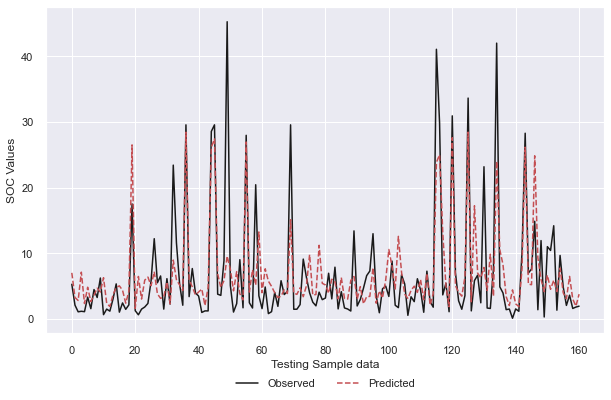

In [134]:
#plotting results of observed/predicted sample data after dropping unnecessary columns defined by feature importance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(x_test))

plt.plot(x_ax,y_test, label ="Observed", color = "k", linestyle = "-")
plt.plot(x_ax,y_predict, label ="Predicted", color = "r", linestyle = "--")
plt.ylabel("SOC Values")
plt.xlabel("Testing Sample data")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = "lower center", ncol =2, frameon = False)
plt.show

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


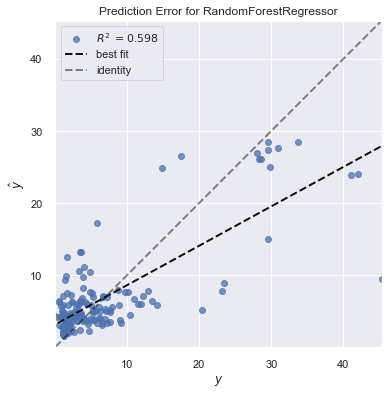

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [135]:
#Plotting the prediction errors

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()
# y axes predicted values   x axes the observed values

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


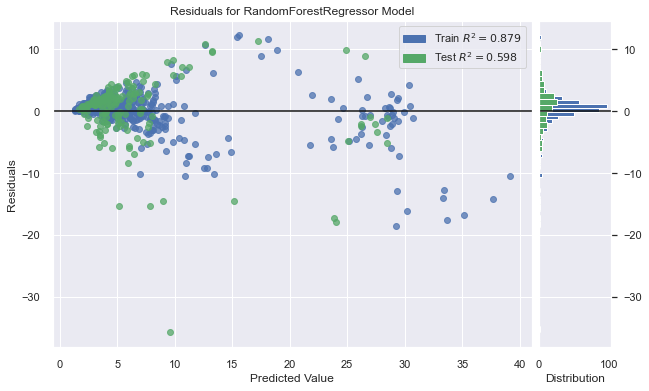

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [136]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [137]:
#feature importance
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
sand1,0.213812
clay1,0.179718
slp_stdev,0.129410
ls_stdev,0.063366
slp_mean,0.054116
tri_stdev,0.032036
ndvi_stdev,0.028855
ls_mean,0.028673
twi_stdev,0.027886
silt1,0.027651


In [138]:
import shap

# Fits the explainer
explainer = shap.Explainer(regressor.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 162it [00:23,  3.81it/s]                                                                        


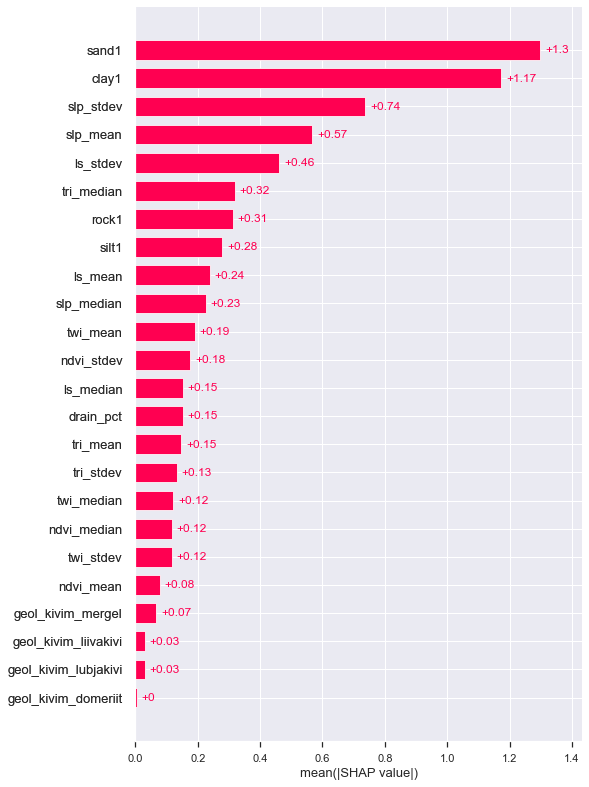

In [139]:
#Bar plot
shap.plots.bar(shap_values, max_display=24)

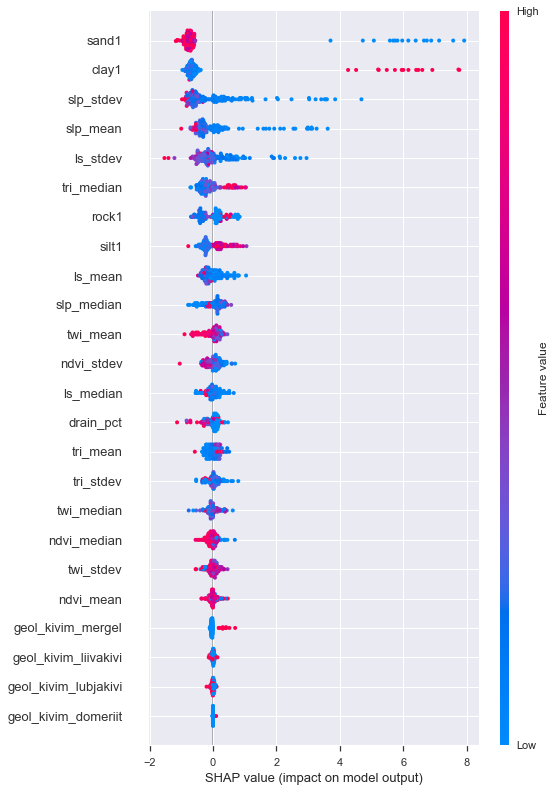

In [140]:
#Summary plot: beeswarm
shap.summary_plot(shap_values, max_display=24)

<h1>Executing Model on final Dataset<h1>

In [141]:
#preprocessing of the final data
estsoil = processed_data

In [142]:
estsoil.dtypes
estsoil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 737190 entries, 1 to 745428
Data columns (total 50 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   orig_fid        737190 non-null  int64   
 1   est_soiltype    737190 non-null  object  
 2   wrb_main        737190 non-null  object  
 3   est_txcode      737190 non-null  object  
 4   nlayers         737190 non-null  float64 
 5   zmx             737190 non-null  float64 
 6   z1              737190 non-null  float64 
 7   est_txt1        737190 non-null  object  
 8   lxtype1         737190 non-null  object  
 9   sand1           737190 non-null  int64   
 10  silt1           737190 non-null  int64   
 11  clay1           737190 non-null  int64   
 12  rock1           737190 non-null  int64   
 13  k1              737190 non-null  float64 
 14  awc1            737190 non-null  float64 
 15  tri_mean        737190 non-null  float64 
 16  tri_stdev       737190 non-nul

In [143]:

estsoil_ml = estsoil[[
    
"clay1",
"ndvi_stdev",
"ndvi_mean",
"ls_stdev",
"ls_mean",
"drain_pct",
"ndvi_median",
"tri_mean",
"tri_stdev",
"slp_stdev",
"ls_median",
"twi_stdev",
"tri_median",
"slp_median",
"twi_median",
"slp_mean",
"geol_kivim",
"rock1",
"twi_mean",
"silt1",
"sand1"

]]



In [144]:
#analyzing "object" type columns
estsoil_ml.select_dtypes(include=["object"])

,geol_kivim
1,mergel
3,mergel
4,mergel
5,mergel
8,mergel
...,...
745422,mergel
745423,mergel
745424,mergel
745425,mergel


In [145]:
dummy_estsoil_ml = pd.get_dummies(estsoil_ml, columns = ["geol_kivim"], drop_first=False)

In [146]:
#checking null values
dummy_estsoil_ml.isnull().sum()

clay1                   0
ndvi_stdev              0
ndvi_mean               0
ls_stdev                0
ls_mean                 0
drain_pct               0
ndvi_median             0
tri_mean                0
tri_stdev               0
slp_stdev               0
ls_median               0
twi_stdev               0
tri_median              0
slp_median              0
twi_median              0
slp_mean                0
rock1                   0
twi_mean                0
silt1                   0
sand1                   0
geol_kivim_domeriit     0
geol_kivim_liivakivi    0
geol_kivim_lubjakivi    0
geol_kivim_mergel       0
dtype: int64

In [147]:
dummy_estsoil_ml.shape

(737190, 24)

In [148]:
estsoil_ml_final =dummy_estsoil_ml[[ 
    
"sand1",
"clay1",
"slp_stdev",
"ls_stdev",
"slp_mean",
"ndvi_median",
"silt1",
"tri_stdev",
"twi_median",
"ndvi_stdev",
"ls_median",
"tri_mean",
"ls_mean",
"ndvi_mean",
"slp_median",
"twi_stdev",
"twi_mean",
"drain_pct",
"rock1",
"tri_median",
"geol_kivim_liivakivi",
"geol_kivim_mergel",
"geol_kivim_lubjakivi",
"geol_kivim_domeriit"

]]

In [149]:
# running model on final data
values = estsoil_ml_final.values

display(values.shape)
Prediction = regressor.predict(values)

estsoil['SOC_pred'] = Prediction

display(estsoil.sample(10))

(737190, 24)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,orig_fid,est_soiltype,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,varv,kkt,ndvi_mean,ndvi_median,ndvi_stdev,geol_kivim,geometry,SOC_pred
304432,721330,M''',HS,t₃100-150,1.0,1250.0,1250.0,t3,PEAT,15,15,70,0,9.20,0.189545,0.056176,0.031917,0.066603,10.870670,11.204865,1.354923,0.658178,0.266926,1.022678,0.132732,0.073270,0.193530,0.0,0.000,0.000000,0.000000,139270.684051,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17,JO,0.881889,0.887936,0.025904,domeriit,"MULTIPOLYGON (((587809.820 6492151.000, 587756...",17.323556
68077,505436,LkI,RT,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.185833,1.204464,1.154616,0.675247,5.054441,4.451352,1.783617,17.325423,17.413092,8.911241,6.420331,5.619627,6.464824,0.0,0.000,0.000000,0.000000,5917.151526,92.091221,0.000000,0.000000,0.0,0.0,508.163972,7.908779,0.000000,0.000000,0.000000,0.000000,1,JK,0.895578,0.907252,0.051879,liivakivi,"MULTIPOLYGON (((668943.650 6430253.530, 668939...",4.520687
620955,202705,Go1,GL,pl45/r₂ls₁,2.0,1000.0,450.0,pl,S,90,3,7,0,113.71,0.191000,0.081981,0.055153,0.074444,9.435497,9.521109,0.845706,0.855532,0.580242,0.835849,0.074514,0.072104,0.088884,25914.0,60.334,19858.196192,46.234940,23092.430208,53.765060,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16,AN,0.853213,0.878841,0.054915,lubjakivi,"MULTIPOLYGON (((481058.320 6544849.160, 481047...",16.201219
385470,623042,LPg,UM,k⁰₁sl30-50/k⁰₁ls₂,2.0,1000.0,400.0,sl,LS,82,9,9,6,37.54,0.187500,0.083066,0.061931,0.060463,9.539495,9.668825,0.853513,0.968768,0.735286,0.784295,0.103174,0.078660,0.138384,50017.0,98.151,38476.530185,75.505463,7023.685795,13.783120,1038.355948,2.037646,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4420.032715,8.673771,7,JK,0.741131,0.729282,0.106149,liivakivi,"MULTIPOLYGON (((687924.250 6454602.220, 687932...",13.377111
146344,537790,LkII,RT,l140-190/sl,2.0,1815.0,1650.0,l,S,90,5,5,0,133.21,0.193333,0.127495,0.117701,0.058929,8.811345,8.831713,0.979104,1.599555,1.448208,0.903342,0.168074,0.143242,0.174834,0.0,0.000,0.000000,0.000000,29453.009149,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.607654,0.733032,0.250583,liivakivi,"MULTIPOLYGON (((670293.930 6398257.500, 670297...",17.171492
499612,482378,LkI,RT,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.191667,0.145074,0.139107,0.064061,8.213283,8.151188,0.579969,2.172434,2.193759,0.855648,0.389973,0.414361,0.274951,0.0,0.000,0.000000,0.000000,2389.181816,100.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,JK,0.861054,0.860896,0.011657,liivakivi,"MULTIPOLYGON (((631853.620 6599804.970, 631853...",17.970634
422095,42,Ag,FL,l/tls,2.0,1000.0,500.0,l,S,90,5,5,0,133.21,0.196875,0.220528,0.140244,0.194143,7.738565,7.827540,1.260729,2.936636,1.931594,2.579525,0.275933,0.154517,0.350885,0.0,0.000,0.000000,0.000000,0.000000,0.000000,3147.294856,25.311747,0.0,0.0,9267.818766,74.535338,19.013628,0.152915,0.000000,0.000000,15,ND,0.619802,0.663448,0.173738,liivakivi,"MULTIPOLYGON (((668716.820 6526861.050, 668719...",17.472115
20032,33596,Dg,UM,sl,1.0,1000.0,1000.0,sl,LS,82,9,9,0,37.54,0.191667,0.386848,0.387359,0.122190,6.962630,6.900687,1.304195,6.121600,6.219783,1.976092,1.350950,1.070284,1.060926,0.0,0.000,0.000000,0.000000,2384.742088,67.328956,1157.184362,32.671044,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19,ND,0.898263,0.914781,0.031092,lubjakivi,"MULTIPOLYGON (((704809.520 6404678.990, 704815...",11.812461
274061,688985,M'',HS,t₃50-100/ls₂,2.0,1000.0,750.0,t3,PEAT,15,15,70,0,9.20,0.192000,0.074106,0.047415,0.083688,10.754463,10.784174

In [150]:
# estsoil.to_file('data/final_general_estsoil_soc_pred.shp', encoding='utf-8')

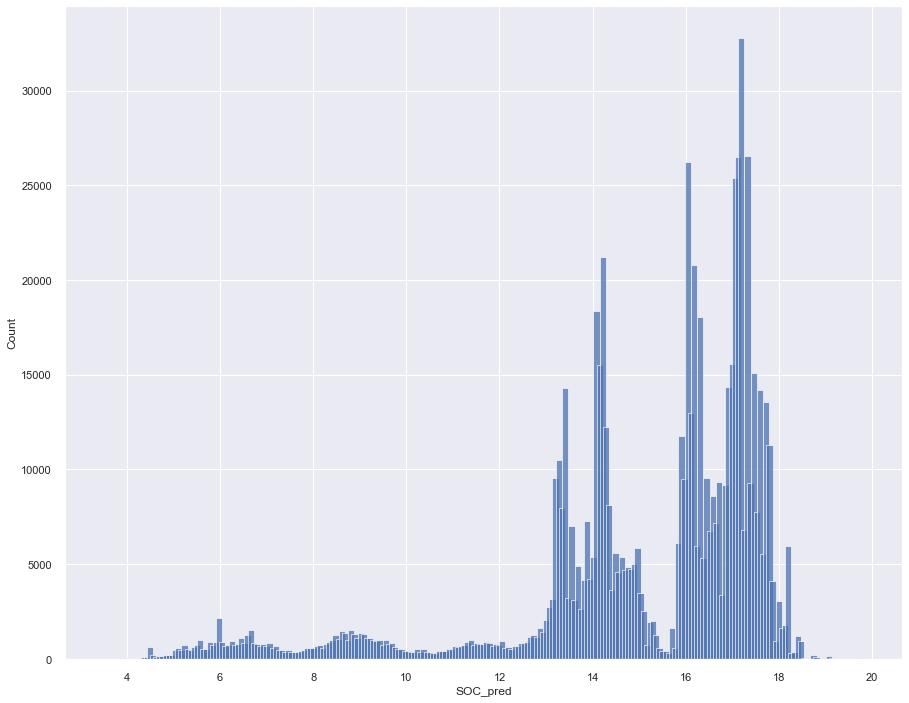

In [154]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(14,12)})

In [152]:
estsoil["SOC_pred"].min()

3.5158419315232665

In [153]:
estsoil["SOC_pred"].max()

19.790993810794024